In [1]:
import pickle
import pathlib 

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
# from matplotlib.ticker import MaxNLocator
# import matplotlib.colors as colors
# import matplotlib.cm as cmx
# import matplotlib.ticker as mtick
# import matplotlib.lines as lines

from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

from matplotlib.collections import LineCollection


import seaborn as sns

import config

## Latent space plot (adaptive walks)

In [2]:
with open("../DHFR/plot/adaptive_walks_start_latent.pkl", "rb") as fh:
    adaptive_walks_start_latent = pickle.load(fh)
with open("../DHFR/plot/adaptive_walks_trace_latent.pkl", "rb") as fh:
    adaptive_walks_trace_latent = pickle.load(fh)

In [3]:
# Make it easy to find a sequence's latent coordinates using indexing
# There are duplicates in the list of sequences so this will only point
# last one of the duplicates
trace_lookup_d = {s:i for i, s in 
                  enumerate(adaptive_walks_trace_latent['seqs'])}

# read in the few adaptive walks that have the complete traces
# for the entire walk. These are numbered 3000 - 3010

traces_df = []
for p in pathlib.Path("../working/adaptive_walk/random").glob("walk_30*.csv"):
    df = pd.read_csv(p)
    df["latent_x"] = df.protein.map(lambda x: 
       adaptive_walks_trace_latent["means"][trace_lookup_d[x]][0])
    df["latent_y"] = df.protein.map(lambda x: 
       adaptive_walks_trace_latent["means"][trace_lookup_d[x]][1])
    traces_df.append(df)

In [4]:
max_trace_energy = max(map(lambda x: x.energy.max(), traces_df ))
min_trace_energy = min(map(lambda x: x.energy.min(), traces_df ))

print(f"max trace energy: {max_trace_energy:.3f} "
      f"min trace energy: {min_trace_energy:.3f}")

max trace energy: 1.718 min trace energy: 0.755


In [5]:
# drop the first and the last sequence as those are wildtype and the 
# sequence that all the adaptive walks converge to
start_seqs = adaptive_walks_start_latent['seqs'][1:-1]
start_seqs_latent = adaptive_walks_start_latent['means'][1:-1, :]
start_seqs_latent.shape

(2998, 2)

In [6]:
assert(adaptive_walks_start_latent['seqs'][0] == config.WT_AA)

# first seq is wildtype
wt_latent = adaptive_walks_start_latent['means'][0, :]
wt_latent_x, wt_latent_y = wt_latent

# last sequence is the master sequence - (what all walks converge to)
master_latent = adaptive_walks_start_latent['means'][-1, :]
master_latent_x, master_latent_y = master_latent

### Evenly spaced starting points in the latent space

In [7]:
# we started with evenly sampled latent points
# then we sampled a sequence that had no gaps in it
# then we recomputed the latent space of those sampled sequences
with open("../DHFR/plot/sample_latent_points_redo_latent.pkl", "rb") as fh:
    even_sample_latent_points = pickle.load(fh)
with open("../DHFR/plot/adaptive_walks_trace_even_seqs.pkl", "rb") as fh:
    even_sample_trace_latent = pickle.load(fh)


In [8]:
start_seqs = even_sample_latent_points['seqs'][1:-1]
start_seqs_latent = even_sample_latent_points['means'][1:-1, :]
start_seqs_latent.shape

(1598, 2)

In [9]:
# overwrite the traces
trace_lookup_d = {s:i for i, s in 
              enumerate(even_sample_trace_latent['seqs'])}

traces_df = []
for p in pathlib.Path("../working/adaptive_walk/even").glob("walk_*.csv"):
    df = pd.read_csv(p)
    df["latent_x"] = df.protein.map(lambda x: 
       even_sample_trace_latent["means"][trace_lookup_d[x]][0])
    df["latent_y"] = df.protein.map(lambda x: 
       even_sample_trace_latent["means"][trace_lookup_d[x]][1])
    traces_df.append(df)
    
len(traces_df)

1600

In [10]:
traced_starts = pd.concat([df.head(1) for df in traces_df])

In [11]:
idxs_to_trace = [
    #traced_starts.latent_x.argmax(),
    #traced_starts.latent_x.argmin(),
    #traced_starts.latent_y.argmax(),
    #traced_starts.latent_y.argmin(),
    #(traced_starts.latent_x + traced_starts.latent_y).argmax(),
    #(traced_starts.latent_x + traced_starts.latent_y).argmin()
]

In [12]:
np.where((traced_starts.latent_x > 4) & 
         (traced_starts.latent_y < -2))

(array([ 256,  265,  273,  277,  281,  284,  289,  290,  296,  297,  298,
         304,  305,  306,  312,  313,  320,  569,  577,  579,  585,  587,
         594,  596,  602,  605,  610,  612,  618,  619,  620,  626,  635,
         640,  875,  886,  892,  899,  901,  908,  911,  917,  921,  923,
         924,  925,  931,  933,  939,  941,  947, 1197, 1207, 1215, 1216,
        1223, 1224, 1230, 1237, 1239, 1245, 1247, 1254, 1255, 1262, 1272,
        1517, 1525, 1534, 1542, 1550, 1557, 1558, 1563, 1564, 1569, 1573,
        1577]),)

In [13]:
np.where((traced_starts.latent_x > 2) & 
         (traced_starts.latent_y < -4))

(array([ 205,  215,  220,  226,  228,  236,  242,  249,  257,  264,  272,
         277,  284,  290,  297,  304,  306,  312,  320,  521,  549,  557,
         565,  571,  583,  587,  589,  595,  596,  605,  612,  620,  626,
         635,  640,  848,  854,  863,  870,  877,  883,  891,  925,  931,
         933,  939,  941,  947, 1164, 1173, 1179, 1187, 1196, 1204, 1254,
        1262, 1272, 1487, 1494, 1502, 1510, 1519, 1563, 1569, 1573, 1577]),)

In [14]:
np.where((traced_starts.latent_x < 2) &
         (traced_starts.latent_x > -2) &
         (traced_starts.latent_y > 4))

(array([ 129,  138,  146,  154,  162,  169,  177,  184,  192,  200,  224,
         470,  478,  484,  494,  503,  511,  520,  528,  537,  555,  789,
         807,  808,  815,  827,  835,  843,  851,  856,  860,  864,  868,
         876,  885,  890,  902, 1104, 1113, 1121, 1129, 1137, 1145, 1153,
        1159, 1167, 1175, 1177, 1183, 1185, 1191, 1194, 1199, 1206, 1214,
        1222, 1231, 1265, 1438, 1445, 1454, 1462, 1469, 1478, 1485, 1505,
        1514, 1522, 1523, 1529, 1531, 1538, 1547, 1554, 1561, 1567]),)

In [15]:
np.where((traced_starts.latent_x < -4) &
         (traced_starts.latent_y > 4))

(array([  22,   30,   40,   48,   59,   67,   78,   86,   93,  359,  367,
         376,  385,  393,  400,  411,  419,  428,  689,  697,  703,  705,
         715,  724,  732,  741,  749,  758,  765, 1023, 1026, 1031, 1034,
        1040, 1042, 1048, 1052, 1056, 1058, 1064, 1071, 1083, 1090, 1100,
        1108, 1346, 1354, 1362, 1364, 1371, 1372, 1379, 1380, 1387, 1388,
        1396, 1405, 1414, 1422, 1429, 1437]),)

In [16]:
np.where((traced_starts.latent_x > 3.5) &
         (traced_starts.latent_y > 4))

(array([ 283,  292,  301,  310,  633,  642,  651,  659,  970,  980,  989,
         998, 1007, 1322, 1330, 1340, 1347, 1355, 1574, 1578, 1596, 1597,
        1598, 1599]),)

In [17]:
np.where((traced_starts.latent_x < -4) &
         (traced_starts.latent_y < -4))

(array([   6,   13,   27,   36,   45,   53,  328,  337,  346,  368,  378,
         387,  647,  658,  666,  675,  696,  704,  972,  979, 1019, 1024,
        1309]),)

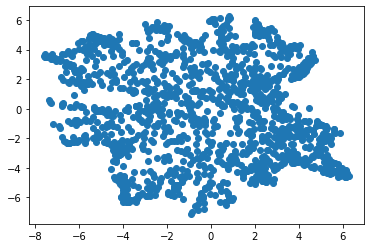

In [18]:
plt.scatter(traced_starts.latent_x, traced_starts.latent_y)

In [19]:
max_trace_energy = max(map(lambda x: x.energy.max(), traces_df ))
min_trace_energy = min(map(lambda x: x.energy.min(), traces_df ))

print(f"max trace energy: {max_trace_energy:.3f} "
      f"min trace energy: {min_trace_energy:.3f}")

max trace energy: 1.466 min trace energy: 0.755


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


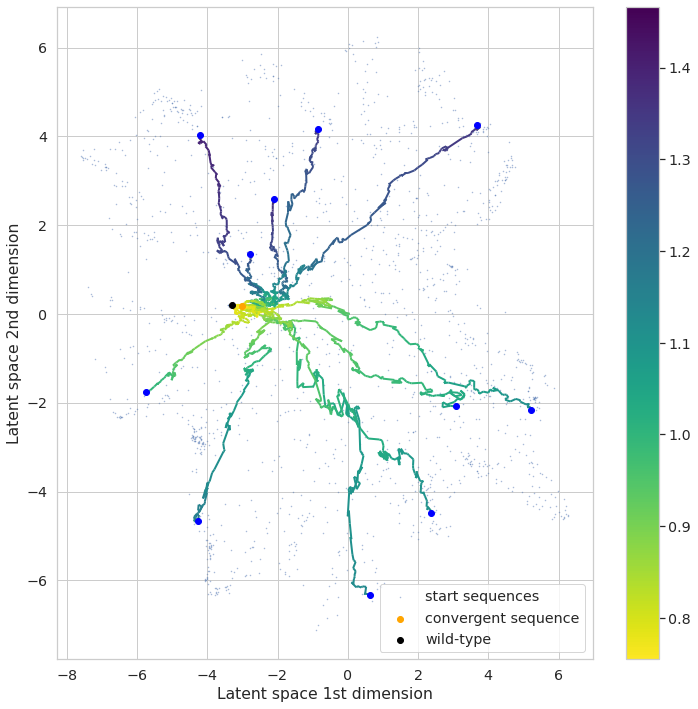

In [20]:
sns.set_theme()
sns.set(font_scale = 1.3, style="whitegrid")


fig = plt.figure(figsize=(12, 12))
axes = fig.gca()
axes.scatter(start_seqs_latent[:, 0], start_seqs_latent[:, 1], 
           s=1, marker=".", alpha=0.5, label="start sequences")


norm = plt.Normalize(min_trace_energy, max_trace_energy)

for i in    [92, 903, 16, 1098, 178, 911, 870, 1113, 1340, 1058, 696]:
    df = traces_df[i]
    label = None
    if i == 0:
        label = "Complete walk starting sequence"
    axes.scatter(df.latent_x[0], df.latent_y[0], marker="o", 
           color="blue", label=label, zorder=3)
    
    points = np.array([df.latent_x, df.latent_y]).T.reshape(-1, 1, 2)
    
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    lc = LineCollection(segments, cmap='viridis_r', norm=norm)
    lc.set_array(df.energy)
    lc.set_linewidth(2)
    line = axes.add_collection(lc)

fig.colorbar(line, ax=axes)

axes.scatter(master_latent_x, master_latent_y, marker="o", 
           color="orange", label="convergent sequence", zorder=3)
axes.scatter(wt_latent_x, wt_latent_y, marker="o", color="black", 
             label="wild-type", zorder=3)


axes.set_xlabel("Latent space 1st dimension")
axes.set_ylabel("Latent space 2nd dimension")
axes.legend(loc="lower right")


plt.savefig(f"{config.ASSETS_DIR}/DHFR_adaptive_walk.png", dpi=300)
plt.savefig(f"{config.ASSETS_DIR}/DHFR_adaptive_walk.eps")

pass


### Shortest path and designed sequences

In [21]:
from energy_py import EnergyFunctionCalculator, energy_calc_msa, energy_calc_single
import energy_py

import torch

WT = config.WT_AA_TENSOR.numpy()

model_prefix = "DHFR_incl_main_kit_taq_mse"

h_i_a = torch.load(f"../working/{model_prefix}_h_i_a.pt").numpy()
e_i_a_j_b = torch.load(f"../working/{model_prefix}_e_i_a_j_b.pt").numpy()
#e_i_a_j_b = e_i_a_j_b / 2.

energy_calc = EnergyFunctionCalculator(h_i_a, e_i_a_j_b)

WT_energy = energy_calc(WT) # lower is fitter
WT_energy # array(0.7909182)


array(0.7909182)

In [22]:
shortest_path = pd.read_csv(
    f"{config.WORKING_DIR}/{model_prefix}_shortest_path.csv")
shortest_path["energy"] = shortest_path.protein.map(
    lambda x: energy_calc(config.string_to_prot(x)))
shortest_path = shortest_path.rename(columns={"index":"dist_WT"})
shortest_path

,dist_WT,protein,energy
0,1,VRPLNCIVAVSQNMGIGKNGDLPWPPLRNEFKYFQRMTTTSSVEGK...,0.790045
1,2,VRPLNCIVAVSQNMGIGKNGDLPWPPLRNEFKYFQRMTTTSSVEGK...,0.789209
2,3,VRPLNCIVAVSQNMGIGKNGDLPWPPLRNEFKYFQRMTTTSSVEGK...,0.788651
3,4,VRPLNCIVAVSQNMGIGKNGDLPWPPLRNEFKYFQRMTTTSSVEGK...,0.788107
4,5,VRPLNCIVAVSQNMGIGKNGDLPWPPLRNEFKYFQRMTTTSSVEGK...,0.787666
5,6,VRPLNCIVAVSQNMGIGKNGDLPWPPLRNEFKYFQRMTTTSSVEGK...,0.787325
6,7,VRPLNCIVAVSQNMGIGKDGDLPWPPLRNEFKYFQRMTTTSSVEGK...,0.787002
7,8,VRPLNCIVAVSQNMGIGKDGDLPWPPLRNEFKYFQRMTTTGSVEGK...,0.786721
8,9,VRPLNCIVAVSQNMGIGKDGDLPWPPLRNEFKYFQRMTTTGSVEGK...,0.786470
9,10,VRPLNCIVAVSQNMGIGKDGDLPWPPLRNEFKYFQRMTTTGSVEGK...,0.786270


In [23]:
designs = pd.read_csv(f"{config.WORKING_DIR}/{model_prefix}_designed.csv")
designs = designs[:-1].copy() # drop the last design as it is a duplicate (to signal that the design process stops)

designs["activity"] = "no"
designs.loc[0, "activity"] = "yes"
designs.loc[1, "activity"] = "yes"


designs

,seq,round_num,energy,natural_energy,dist_WT,dist_common,dist_msa15,dist_prev,activity
0,VRPLNCIVAVSQNMGIGKDGDLPWPPLRNEFKYFQRMTTTGSVEGK...,0,0.786270,-490.657739,10,0,0,0,yes
1,VRPLNCIVAVSQNMGIAKDGDLPWPPLRNEFKYFQRMTTTGSVEGK...,1,0.781615,-479.709964,12,2,2,2,yes
2,VRPLNCIVAVSQNMGIAKDGDLPWPPLRNEFKYFQRMTTTGSVEGK...,2,0.778994,-470.462492,14,4,4,2,no
3,VRPLNCIVAVSQNMGIAKDGDLPWPPLRNEFKYFQRMTTTGSVEGK...,3,0.776915,-460.427448,16,6,6,2,no
4,VRPLNCIVAVSQNMGIAKDGDLPWPPLRNEFKYFQRMTTTGSVEGK...,4,0.775064,-456.275702,18,8,8,2,no
5,VRPLNCIVAVSQNMGIAKDGDLPWPPLRNEFKYFQRMTTTGSVEGK...,5,0.773416,-446.113990,20,10,10,2,no
6,VRPLNCIVAVSQNMGIAKDGDLPWPPLRNEFKYFQRMTTIGSVEGK...,6,0.771807,-439.838341,22,12,12,2,no
7,VRPLNCIVAVSQNMGIAKDGDLPWPPLRNEFKYFQRMTTIGSVEGK...,7,0.770479,-441.243086,23,14,14,2,no
8,VRPLNCIVAVSQNMGIAKDGDLPWPPLRNEFKYFQRMTTIGSVEGK...,8,0.769250,-440.732868,25,16,16,2,no
9,VRPLNCIVAVSQNMGIAKDGDLPWPPLRNEFKYFQRMTTIGSVEGK...,9,0.768139,-442.572899,27,18,18,2,no


In [24]:
trajectory = pd.concat(
                [shortest_path[["dist_WT", "energy"]],
                 designs[["dist_WT", "energy"]] # drop R15 as it is already in shortest_path
                ]).reset_index(drop=True)
trajectory["seq_type"] = "designed"
trajectory.iloc[ :10, trajectory.columns.get_loc('seq_type')] = "shortest_path"
trajectory

,dist_WT,energy,seq_type
0,1,0.790045,shortest_path
1,2,0.789209,shortest_path
2,3,0.788651,shortest_path
3,4,0.788107,shortest_path
4,5,0.787666,shortest_path
5,6,0.787325,shortest_path
6,7,0.787002,shortest_path
7,8,0.786721,shortest_path
8,9,0.786470,shortest_path
9,10,0.786270,shortest_path


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


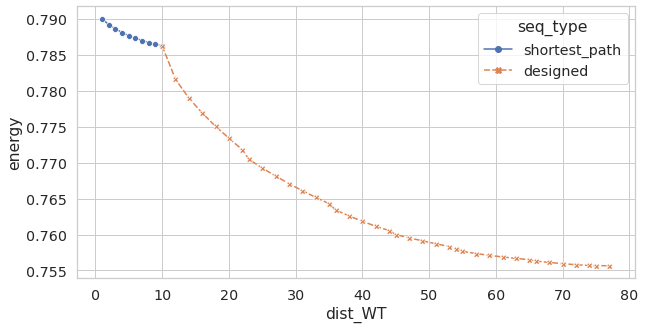

In [25]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
sns.lineplot(x="dist_WT", y="energy", hue="seq_type", style="seq_type",
             markers=True, ax=ax,
             data=trajectory)
plt.savefig(f"{config.ASSETS_DIR}/DHFR_designed_seqs_vs_dist.png", dpi=300)
plt.savefig(f"{config.ASSETS_DIR}/DHFR_designed_seqs_vs_dist.eps")